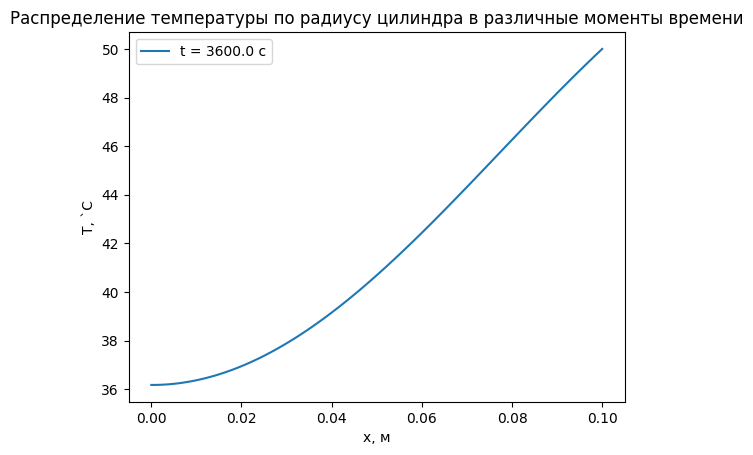

In [107]:
import matplotlib.pyplot as plt

def experement(name_of_experement, N, t_end, R, lamda, ro, c, T0, Th):

    # Определение шагов сетки
    h = R / (N - 1)
    tau = t_end / 100.0

    # Инициализация полей температуры
    T = [T0] * N
    alfa = [0.0] * N
    beta = [0.0] * N

    # Интегрирование уравнения теплопроводности
    time = 0
    while time < t_end:
        time += tau
        alfa[0] = 1.0
        beta[0] = 0.0

        for i in range(1, N - 1):
            ai = 0.5 * lamda * (2 * i + 1) / (h**2 * i)
            ci = 0.5 * lamda * (2 * i - 1) / (h**2 * i)
            bi = ai + ci + ro * c / tau
            fi = -ro * c * T[i] / tau
            alfa[i] = ai / (bi - ci * alfa[i - 1])
            beta[i] = (ci * beta[i - 1] - fi) / (bi - ci * alfa[i - 1])

        T[N - 1] = Th
        for i in range(N - 2, -1, -1):
            T[i] = alfa[i] * T[i + 1] + beta[i]
            if alfa[i] == 0*T[i + 1] == -beta[i]:
                print(alfa[i], T[i + 1], beta[i])

    # Сохранение результатов в файлы
    with open(f'{name_of_experement}_res.txt', 'w') as f:
        f.write(f'Радиус цилиндра R = {R:.4f}\n')
        # Остальные параметры здесь...

    with open(f'{name_of_experement}_tempr.txt', 'w') as g:
        for i in range(N):
            g.write(f'{h * i:.3f} {T[i]:.5f}\n')

    return [h * i for i in range(N)], T

def plot_multiple_graphs(data_list):
    """
    Построение нескольких графиков на одних и тех же осях x и y с разными цветами.

    :param data_list: Список словарей, где каждый словарь содержит списки X и Y для построения графика.
    """
    for data in data_list:
        X = data['X']
        Y = data['Y']
        plt.plot(X, Y, label=data.get('label', None))  # Добавление графика с меткой из словаря, если она есть

    plt.xlabel('x, м')  # Установка подписи для оси X
    plt.ylabel('T, `C')  # Установка подписи для оси Y
    plt.legend()  # Вывод легенды для различных графиков
    plt.title('Распределение температуры по радиусу цилиндра в различные моменты времени')  # Установка заголовка графика
    plt.show()  # Отображение графиков

flag = input('Введите режим работы программы текстом 1) test 2) keyboard 3) file')
data_list = []
if flag == 'test':
    # Пример использования:
    # Ввод параметров
    name_of_experement = 'test'
    N = 100
    R = 0.1
    lamda = 0.12
    ro = 400
    c = 500
    T0 = 20
    Th = 50
    for t_end in [3600, 600, 60]:
        d = experement(name_of_experement, N, t_end, R, lamda, ro, c, T0, Th)
        data = {'X': d[0], 'Y': d[1], 'label': f't = {t_end} c'}
        data_list.append(data)

    plot_multiple_graphs(data_list)
elif flag == 'keyboard':
    name_of_experement = input('Введите название эксперимента: ')
    N = int(input('Введите количество пространственных узлов, N: '))
    R = float(input('Введите радиус цилиндра, R: '))
    lamda = float(input('Введите коэффициент теплопроводности материала пластины, lamda: '))
    ro = float(input('Введите плотность материала пластины, ro: '))
    c = float(input('Введите теплоемкость материала пластины, c: '))
    T0 = float(input('Введите начальную температуру, T0: '))
    Th = float(input('Введите температуру на границе r=R, Th: ')) 
    t_end = float(input('Введите окончание по времени, t_end: '))
    d = experement(name_of_experement, N, t_end, R, lamda, ro, c, T0, Th)
    data = {'X': d[0], 'Y': d[1], 'label': f't = {t_end} c'}
    data_list.append(data)
    plot_multiple_graphs(data_list)
elif flag == 'file':
    input_file_name = input('Введите название файла для считывания исходных данных')
    with open(f'{input_file_name}.txt', 'r') as f:
        name_of_experement = f.readline().split()[-1]
        N = int(f.readline().split()[-1])
        R = float(f.readline().split()[-1])
        lamda = float(f.readline().split()[-1])
        ro = float(f.readline().split()[-1])
        c = float(f.readline().split()[-1])
        T0 = float(f.readline().split()[-1])
        Th = float(f.readline().split()[-1]) 
        t_end = float(f.readline().split()[-1])
        d = experement(name_of_experement, N, t_end, R, lamda, ro, c, T0, Th)
        data = {'X': d[0], 'Y': d[1], 'label': f't = {t_end} c'}
        data_list.append(data)
        plot_multiple_graphs(data_list)